# Labeling Data

In [12]:
import pandas as pd
import numpy as np


def load_data():
  data = pd.read_csv('cats_preprocessed.csv')
  return data

data = load_data()
data.head(101)

,full_text,cleasing,Tokenization and Case Folding,Filtering/stopword removal,Stemming
0,@Southernvaper1 @con_cats @jkelovuori @AlexWod...,Southernvaper concats jkelovuori AlexWodak asa...,"['southernvaper', 'concats', 'jkelovuori', 'al...","['southernvaper', 'concats', 'jkelovuori', 'al...",southernvaper concats jkelovuori alexwodak asa...
1,People generally approve of dogs eating cat f...,People generally approve of dogs eating cat f...,"['people', 'generally', 'approve', 'of', 'dogs...","['people', 'generally', 'approve', 'dogs', 'ea...",people generally approve dogs eating cat food ...
2,@SubRosaMagick Even cats are smarter than Isre...,SubRosaMagick Even cats are smarter than Isrealis,"['subrosamagick', 'even', 'cats', 'are', 'smar...","['subrosamagick', 'even', 'cats', 'smarter', '...",subrosamagick even cats smarter isrealis
3,@lululul92966087 图3非常聪明，因为是女宝：）,lululul 图非常聪明，因为是女宝：）,"['lululul', '图非常聪明，因为是女宝：）']","['lululul', '图非常聪明，因为是女宝：）']",lululul
4,@Cats_ix @ynjinvlog,Catsix ynjinvlog,"['catsix', 'ynjinvlog']","['catsix', 'ynjinvlog']",catsix ynjinvlog
...,...,...,...,...,...
96,My #today's #Catty #cats are: Siamese Red Poin...,My todays Catty cats are Siamese Red Points II,"['my', 'todays', 'catty', 'cats', 'are', 'siam...","['todays', 'catty', 'cats', 'siamese', 'red', ...",todays catty cats siamese red points ii
97,@meisteirdissens моя римская империя это латун...,meisteirdissens моя римская империя это латунс...,"['meisteirdissens', 'моя', 'римская', 'империя...","['meisteirdissens', 'моя', 'римская', 'империя...",meisteirdissens ...
98,But you have already had dinner haha #Cat #Kit...,But you have already had dinner haha Cat Kitte...,"['but', 'you', 'have', 'already', 'had', 'dinn...","['already', 'dinner', 'haha', 'cat', 'kitten',...",already dinner haha cat kitten kittycat pet an...
99,It was a hot day so I took refuge in my mother...,It was a hot day so I took refuge in my mother...,"['it', 'was', 'a', 'hot', 'day', 'so', 'i', 't...","['hot', 'day', 'took', 'refuge', 'mother', 'ca...",hot day took refuge mother car different parki...


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text                      101 non-null    object
 1   cleasing                       101 non-null    object
 2   Tokenization and Case Folding  101 non-null    object
 3   Filtering/stopword removal     101 non-null    object
 4   Stemming                       100 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB


In [14]:
df = pd.DataFrame(data['Stemming'])
df.head(101)

,Stemming
0,southernvaper concats jkelovuori alexwodak asa...
1,people generally approve dogs eating cat food ...
2,subrosamagick even cats smarter isrealis
3,lululul
4,catsix ynjinvlog
...,...
96,todays catty cats siamese red points ii
97,meisteirdissens ...
98,already dinner haha cat kitten kittycat pet an...
99,hot day took refuge mother car different parki...


In [15]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
data_analyzer = SentimentIntensityAnalyzer()

labels = []
scores = []

for text in df['Stemming']:
  if not isinstance(text, str):
    text = str(text)

  sentiment_scores = data_analyzer.polarity_scores(text)
  compound_score = sentiment_scores['compound']

  scores.append(compound_score)

  if compound_score > 0:
    label = 'positive'
  elif compound_score < 0:
    label = 'negative'
  else:
    label = 'netral'

  labels.append(label)

df['sentiment_score'] = scores
df['sentiment'] = labels

data_subset = ['Stemming', 'sentiment_score', 'sentiment']
data_subset = df[data_subset]

data_subset.head(101)

,Stemming,sentiment_score,sentiment
0,southernvaper concats jkelovuori alexwodak asa...,0.0516,positive
1,people generally approve dogs eating cat food ...,0.0000,netral
2,subrosamagick even cats smarter isrealis,0.4588,positive
3,lululul,0.0000,netral
4,catsix ynjinvlog,0.0000,netral
...,...,...,...
96,todays catty cats siamese red points ii,0.0000,netral
97,meisteirdissens ...,0.0000,netral
98,already dinner haha cat kitten kittycat pet an...,0.8020,positive
99,hot day took refuge mother car different parki...,0.7845,positive


In [17]:
df_cleaned = data_subset.dropna()
df_cleaned.head(101)

,Stemming,sentiment_score,sentiment
0,southernvaper concats jkelovuori alexwodak asa...,0.0516,positive
1,people generally approve dogs eating cat food ...,0.0000,netral
2,subrosamagick even cats smarter isrealis,0.4588,positive
3,lululul,0.0000,netral
4,catsix ynjinvlog,0.0000,netral
...,...,...,...
96,todays catty cats siamese red points ii,0.0000,netral
97,meisteirdissens ...,0.0000,netral
98,already dinner haha cat kitten kittycat pet an...,0.8020,positive
99,hot day took refuge mother car different parki...,0.7845,positive


<ipython-input-18-77ab934d9801>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


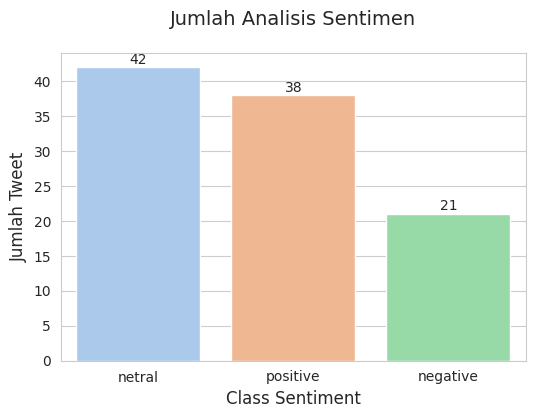

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data_subset['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')

plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [19]:
data_subset.to_csv('cats_sentiment_analysis.csv', encoding='utf8', index=False)

# Naive Bayes Classifier

Data training

In [20]:
!pip install scikit-learn

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# Spliting dataset latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(df_cleaned['Stemming'], df_cleaned['sentiment'], test_size=0.2, random_state=42)

In [25]:
# Mencetak jumlah data latih dan data uji

print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')

Jumlah data latih: 80
Jumlah data uji: 20


In [26]:
# Ekstraksi fitur: mengubah teks menjadi vektor fitur

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [28]:
# Cetak hasil ekstraksi fitur

print('Hasil Ekstraksi Fitur:')
print('-----------------------')
print('Vektor Fitur Data Latih:')
print(X_train_vectorized.toarray())
print('\nVektor Fitur Data Uji:')
print(X_test_vectorized.toarray())

Hasil Ekstraksi Fitur:
-----------------------
Vektor Fitur Data Latih:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Vektor Fitur Data Uji:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
# Latih model Naive Bayes menggunakan Multinomial Naive Bayes

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [31]:
# Evaluasi model menggunakan data uji

predictions = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, predictions)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

print('\nClassification Report:\n', classification_report(y_test, predictions))

print('\nConfusion Matrix:\n', confusion_matrix(y_test, predictions))

Akurasi Model: 60.00%

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
      netral       0.62      0.83      0.71         6
    positive       0.70      0.64      0.67        11

    accuracy                           0.60        20
   macro avg       0.44      0.49      0.46        20
weighted avg       0.57      0.60      0.58        20


Confusion Matrix:
 [[0 1 2]
 [0 5 1]
 [2 2 7]]


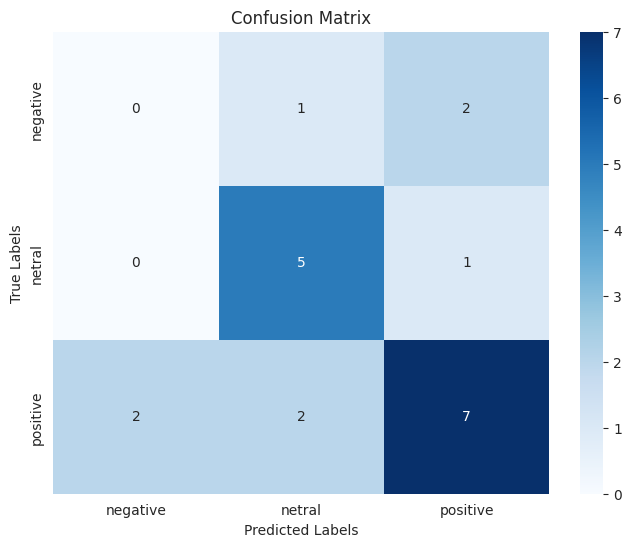

In [32]:
# Untuk membuat plot confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'netral', 'positive'], yticklabels=['negative', 'netral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Evaluasi Model menggunakan data latih
EValuasi model menggunakan data latih biasanya bukan praktik yang disarankan karena ini dapat menyebabkan overfitting. Overfitting terjadi ketika model terlalu "menghafal" data latih dan tidak dapat menggeneralisasi dengan baik pada data baru. Kita lebih menggunakan data uji untuk mengevaluasi kinerja model.

Akurasi Model (Data Latih): 100.00%

Classification Report (Data Latih):
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        18
      netral       1.00      1.00      1.00        35
    positive       1.00      1.00      1.00        27

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



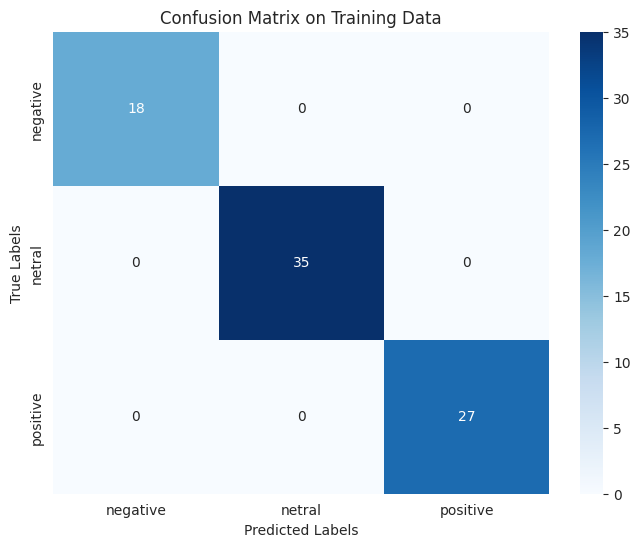

In [33]:
# Evaluasi model menggunakan data latih
predictions_train = model.predict(X_train_vectorized)

# Akurasi
accuracy_train = accuracy_score(y_train, predictions_train)
print(f'Akurasi Model (Data Latih): {accuracy_train * 100:.2f}%')

# Report klasifikasi
print('\nClassification Report (Data Latih):\n', classification_report(y_train, predictions_train))

# Confusion matrix
conf_matrix_train = confusion_matrix(y_train, predictions_train)

# Plot confusion matrix untuk data latih
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'netral', 'positive'], yticklabels=['negative', 'netral', 'positive'])
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Support Vector Machine (SVM)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
# Spliting dataset latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(df_cleaned['Stemming'], df_cleaned['sentiment'], test_size=0.3, random_state=42)

In [36]:
print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')

Jumlah data latih: 70
Jumlah data uji: 30


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ekstraksi fitur: mengubah teks menjadi vektor fitur menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Transformasi data teks menjadi vektor TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [38]:
# Cetak nama fitur dari TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Cetak beberapa contoh hasil transformasi dari data pelatihan
print("hasil transformasi dari data pelatihan:")
print(X_train_tfidf)

# Cetak beberapa contoh fitur dari vektor TF-IDF
print('\nFitur dari vektor TF-IDF:')
print(feature_names)

hasil transformasi dari data pelatihan:
  (0, 300)	1.0
  (1, 465)	0.17158705062102073
  (1, 180)	0.15636173839520265
  (1, 118)	0.34317410124204145
  (1, 418)	0.34317410124204145
  (1, 442)	0.17158705062102073
  (1, 298)	0.17158705062102073
  (1, 27)	0.17158705062102073
  (1, 290)	0.17158705062102073
  (1, 128)	0.17158705062102073
  (1, 193)	0.15636173839520265
  (1, 280)	0.14555920745663337
  (1, 34)	0.17158705062102073
  (1, 85)	0.058169370464159535
  (1, 419)	0.17158705062102073
  (1, 464)	0.17158705062102073
  (1, 373)	0.17158705062102073
  (1, 429)	0.17158705062102073
  (1, 506)	0.17158705062102073
  (1, 94)	0.17158705062102073
  (1, 305)	0.34317410124204145
  (1, 339)	0.15636173839520265
  (1, 190)	0.1371801134926951
  (1, 10)	0.17158705062102073
  (1, 507)	0.17158705062102073
  :	:
  (68, 198)	0.3002114852874475
  (68, 375)	0.3002114852874475
  (68, 179)	0.3002114852874475
  (69, 85)	0.15799763005182213
  (69, 520)	0.12420129155681173
  (69, 535)	0.13178762652840684
  (69, 445)	

In [39]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Latih model SVM
svm_model.fit(X_train_tfidf, y_train)

# Cetak parameter model
print("Parameter Model SVM:")
print(f"Kernel: {svm_model.kernel}")
print(f"C: {svm_model.C}")
print(f"Intercept: {svm_model.intercept_}")
print(f"Support Vectors: {svm_model.support_vectors_}")

Parameter Model SVM:
Kernel: linear
C: 1.0
Intercept: [-0.38115955 -0.34771494  0.06510885]
Support Vectors:   (0, 55)	0.13469931407962957
  (0, 57)	0.13469931407962957
  (0, 73)	0.13469931407962957
  (0, 85)	0.04566413533893017
  (0, 124)	0.13469931407962957
  (0, 136)	0.13469931407962957
  (0, 141)	0.13469931407962957
  (0, 150)	0.13469931407962957
  (0, 171)	0.13469931407962957
  (0, 178)	0.13469931407962957
  (0, 216)	0.13469931407962957
  (0, 239)	0.13469931407962957
  (0, 242)	0.13469931407962957
  (0, 243)	0.13469931407962957
  (0, 244)	0.13469931407962957
  (0, 245)	0.13469931407962957
  (0, 261)	0.13469931407962957
  (0, 285)	0.13469931407962957
  (0, 286)	0.13469931407962957
  (0, 292)	0.13469931407962957
  (0, 294)	0.13469931407962957
  (0, 301)	0.13469931407962957
  (0, 307)	0.13469931407962957
  (0, 309)	0.13469931407962957
  (0, 310)	0.13469931407962957
  :	:
  (65, 85)	0.23311071032923794
  (65, 281)	0.6876261326948672
  (66, 85)	0.17067420954403315
  (66, 153)	0.4587795

In [40]:
# Menguji model pada data pengujian yang sudah di-vektorisasi
y_pred = svm_model.predict(X_test_tfidf)

# Cetak beberapa contoh hasil prediksi
print("Contoh hasil prediksi pada data pengujian:")
print(y_pred[:10])

Contoh hasil prediksi pada data pengujian:
['positive' 'positive' 'positive' 'netral' 'positive' 'positive' 'netral'
 'positive' 'positive' 'negative']


In [41]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

Akurasi Model: 66.67%


In [42]:
# Output classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.33      0.44         6
      netral       0.77      0.77      0.77        13
    positive       0.57      0.73      0.64        11

    accuracy                           0.67        30
   macro avg       0.67      0.61      0.62        30
weighted avg       0.68      0.67      0.66        30



In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Cetak confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 2  1  3]
 [ 0 10  3]
 [ 1  2  8]]


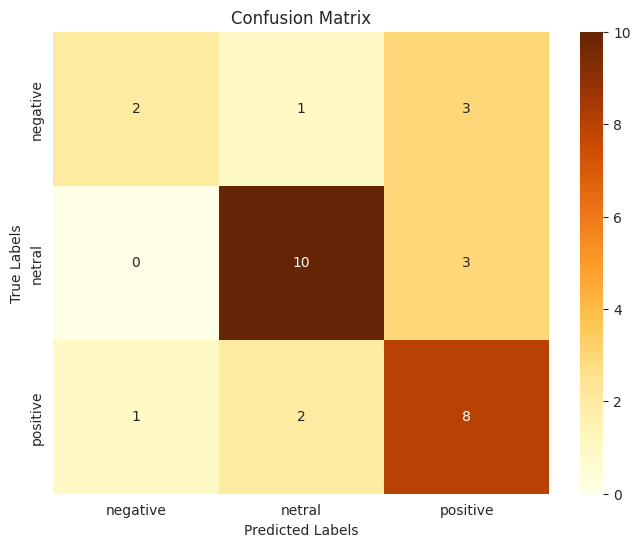

In [45]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['negative', 'netral', 'positive'], yticklabels=['negative', 'netral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()